# Project 1: Iterative Methods and Flying Objects

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Euler Method
We're going to make a first approximation of an iterative scheme to simulate an object flying through the air in one dimension under the influence of gravity

In [119]:
#initialization
t_0 = 0 #initial time (s)
t_f = 10 #final time (s)
dt = 0.1 #seconds
g = 10 #grav constant (m/s**2)
y_0 = 0 #initial y-pos (m)
v_0 = 0 #initial y-vel (m)

#Arrays to store data

time = [t_0]
pos = [y_0]
vel = [v_0]

Now we will use equations to explicitly find the next position/velocity of a ball given initial conditions.

$y_{i+1} = y_i + \delta t * v_i$

$v_{i+1} = v_i - \delta t * g$

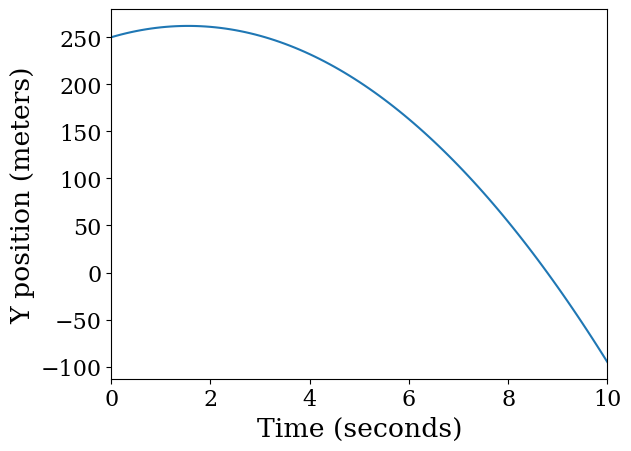

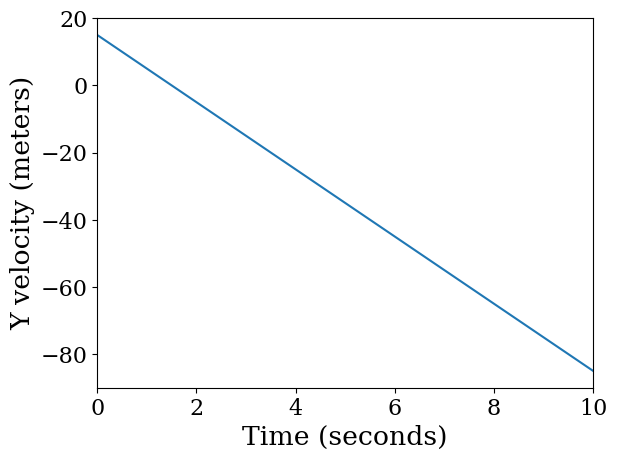

In [122]:
#Let's make this a function
t_0 = 0

def euler(y0,v0,tf):
    time = [t_0]
    pos = [y0]
    vel = [v0]
    i = 0
    while time[i] < t_f:
        #update time
        time.append(t_0 + (i + 1) * dt)
        #update position
        pos.append(pos[i] + dt * vel[i])
        #update velocity
        vel.append(vel[i] - dt * g)
        i = i + 1
    return time, pos, vel

euler(250,15,10)

def pos_euler(y0,v0,tf):
    return np.asarray(euler(y0,v0,tf)[1])

def vel_euler(y0,v0,tf):
    return np.asarray(euler(y0,v0,tf)[2])

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 16,
    'axes.labelsize': 'large',
    'mathtext.fontset': 'stix'
})

#Plot position and velocity versus time of Euler algorithm
plt.plot(euler(250,15,10)[0],euler(250,15,10)[1])
plt.xlabel('Time (seconds)')
plt.ylabel('Y position (meters)')
plt.xlim(t_0, 10)
plt.show()
plt.plot(euler(250,15,10)[0],euler(250,15,10)[2])
plt.xlabel('Time (seconds)')
plt.ylabel('Y velocity (meters)')
plt.xlim(t_0, 10)
plt.show()

### Energy of Euler's Method

Now we'll consider the energy of the moving object. We'll consider the potential energy from the gravitational field and the kinetic energy. Ideally, if our model is working, then the total amount of energy (per unit mass) will be constant with time.

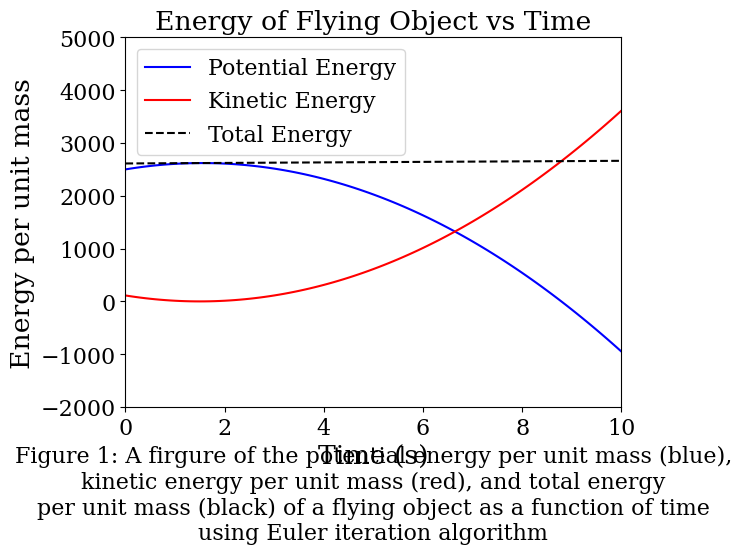

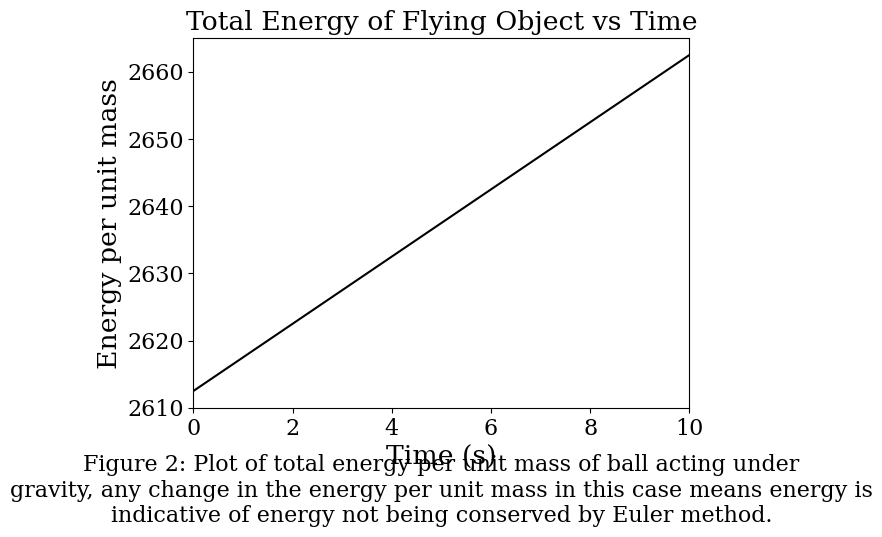

In [125]:
potential_energy = np.asarray(euler(250,15,10)[1]) * 10 #KE per unit mass
kinetic_energy = np.asarray(euler(250,15,10)[2])**2 * 0.5 #KE per unit mass
tot_energy = potential_energy + kinetic_energy

plt.plot(euler(250,15,10)[0], potential_energy, color = 'blue',
         label = 'Potential Energy')
plt.plot(euler(250,15,10)[0], kinetic_energy, color = 'red',
         label = 'Kinetic Energy')
plt.plot(euler(250,15,10)[0], tot_energy, color = 'black', linestyle = '--', 
         label = 'Total Energy')
plt.ylabel('Energy per unit mass')
plt.xlabel('Time (s)')
plt.title('Energy of Flying Object vs Time')
plt.text(5, -4500, 'Figure 1: A firgure of the potential energy per unit mass (blue),\n' +
         'kinetic energy per unit mass (red), and total energy\n' +
         'per unit mass (black) of a flying object as a function of time\n' +
         'using Euler iteration algorithm', horizontalalignment = 'center')
plt.xlim(0,10)
plt.ylim(-2000,5000)
plt.legend()
plt.show()

plt.plot(euler(250,15,10)[0], tot_energy, color = 'black', linestyle = '-')
plt.title('Total Energy of Flying Object vs Time')
plt.ylabel('Energy per unit mass')
plt.xlabel('Time (s)')
plt.xlim(0,10)
plt.text(5, 2593, 'Figure 2: Plot of total energy per unit mass of ball acting under\n' +
         'gravity, any change in the energy per unit mass in this case means energy is\n' +
         'indicative of energy not being conserved by Euler method.',
         horizontalalignment = 'center')
plt.show()

As we can see, the amount of energy the ball increases with time, which is pretty problematic considering the first law of thermodynamic isn't really up for debate. We'll take a look at the error of Euler comparing it to the known kinematic equation to see additional evidence that perhaps we ought to look elsewhere for a physical model.

### Error of Euler's

### Comparison to continuous function

Let's compare this iterative scheme to a fucntion that described the trajectory of a ball in the air starting from height y_0 and with velocity v_0.

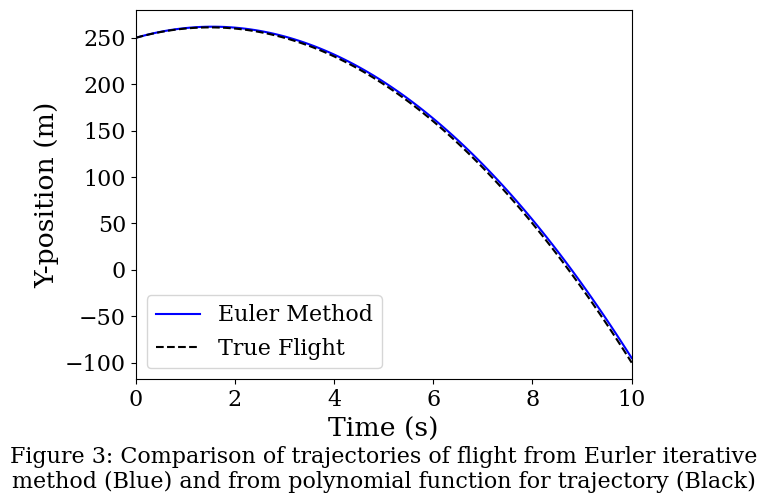

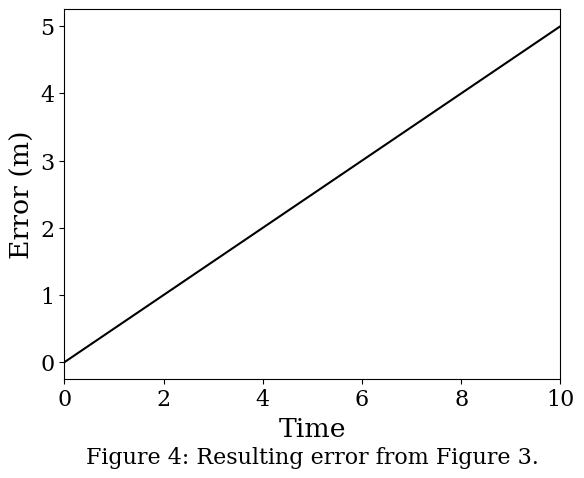

In [139]:
def traj(y_0, v_0, t):
    y = y_0 + v_0 * t - 0.5 * g * t**2
    return y

dt = 0.1

t_f = 10

nstep = int(t_f / dt + 1)

flight = np.linspace(0, t_f, nstep)

plt.plot(euler(250,15,10)[0], euler(250,15,10)[1], c = 'blue', linestyle = '-',
        label = 'Euler Method')
plt.plot(flight, traj(250, 15, flight), c = 'black', linestyle = '--', label = 'True Flight')
plt.xlabel('Time (s)')
plt.ylabel('Y-position (m)')
plt.xlim(0,t_f)
plt.text(5,-235,'Figure 3: Comparison of trajectories of flight from Eurler iterative\n' +
        'method (Blue) and from polynomial function for trajectory (Black)',
         horizontalalignment = 'center')
plt.legend()
plt.show()

plt.plot(flight, (euler(250,15,10)[1] - traj(250, 15, flight)), c = 'black')
plt.xlabel('Time')
plt.ylabel('Error (m)')
plt.xlim(0,t_f)
#plt.ylim(0,5)
plt.text(5, -1.5, 'Figure 4: Resulting error from Figure 3.',
         horizontalalignment = 'center')
plt.show()

Not so great. Error grows with time and gets to 5 meters of difference after 10 seconds. Maybe we should look elsewhere for an iterative scheme that models an object flying through the air.

## Method 1.5: Reverse/Backwards Euler

Before giving up on Euler let's try to modify the expression a little bit to see if it imporves the accuracy. Instead of using the velocity from the previous iteration, $v_i$ to find $y_{i+1}$ we'll use $v_{i+1}$ instead.

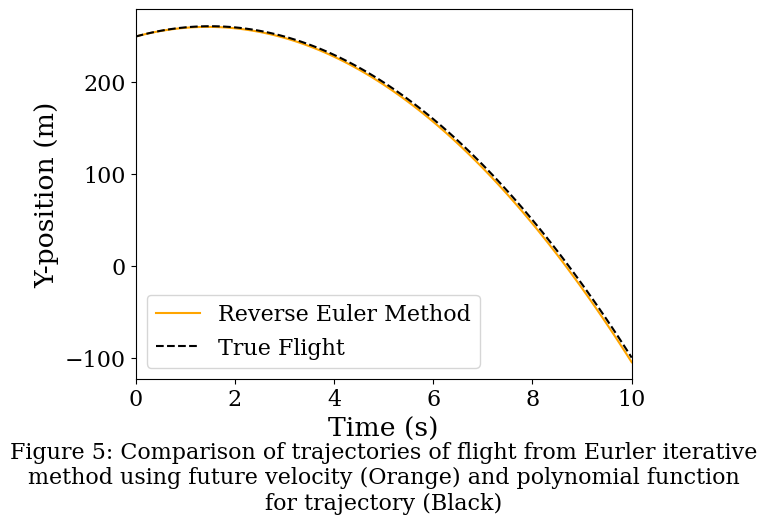

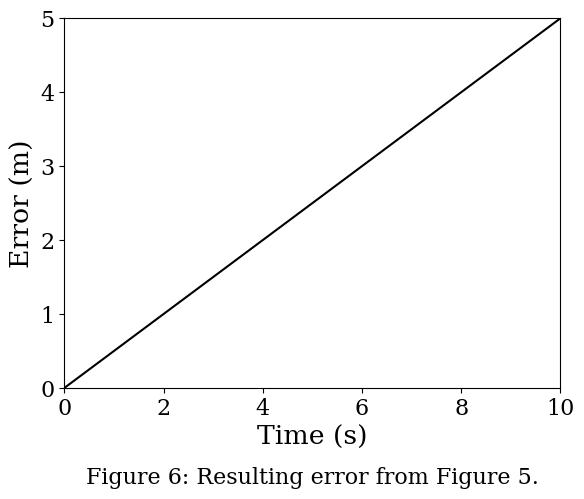

In [148]:
def euler_v2(y0,v0,tf):
    time = [t_0]
    pos = [y0]
    vel = [v0]
    i = 0
    while time[i] < t_f:
        #update time
        time.append(t_0 + (i + 1) * dt)
        #update velocity
        vel.append(vel[i] - dt * g)
        #update position
        pos.append(pos[i] + dt * vel[i+1])
        i = i + 1
    return time, pos, vel

def pos_euler_v2(y0,v0,tf):
    return np.asarray(euler_v2(y0,v0,tf)[1])

def vel_euler_v2(y0,v0,tf):
    return np.asarray(euler_v2(y0,v0,tf)[2])

plt.plot(euler_v2(250,15,10)[0], euler_v2(250,15,10)[1] , c = 'orange', linestyle = '-',
        label = 'Reverse Euler Method')
plt.plot(flight, traj(250, 15, flight), c = 'black', linestyle = '--', label = 'True Flight')
plt.xlabel('Time (s)')
plt.ylabel('Y-position (m)')
plt.xlim(0,t_f)
plt.text(5,-265,'Figure 5: Comparison of trajectories of flight from Eurler iterative\n' +
        'method using future velocity (Orange) and polynomial function\n' +
         'for trajectory (Black)', horizontalalignment = 'center')
plt.legend()
plt.show()

plt.plot(flight, abs((euler_v2(250,15,10)[1] - traj(250, 15, flight))), c = 'black')
plt.xlabel('Time (s)')
plt.ylabel('Error (m)')
plt.xlim(0,t_f)
plt.ylim(0,5)
plt.text(5, -1.3, 'Figure 6: Resulting error from Figure 5.',
         horizontalalignment = 'center')
plt.show()

### Error on Reverse Euler

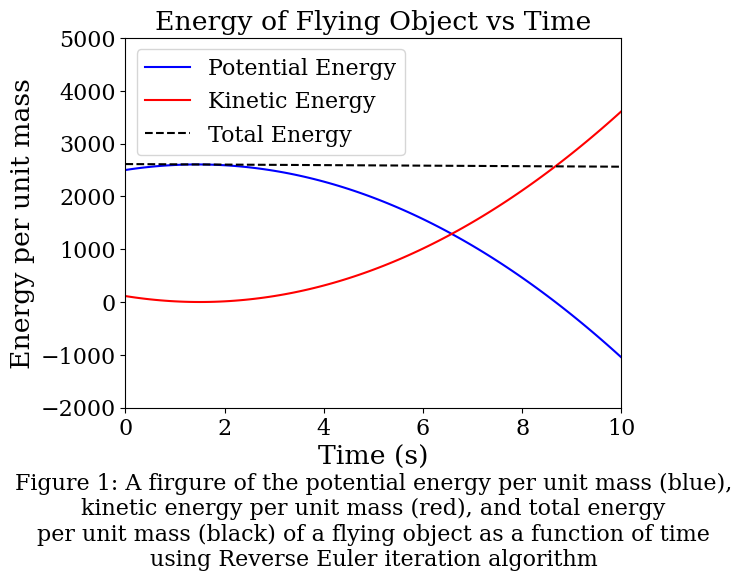

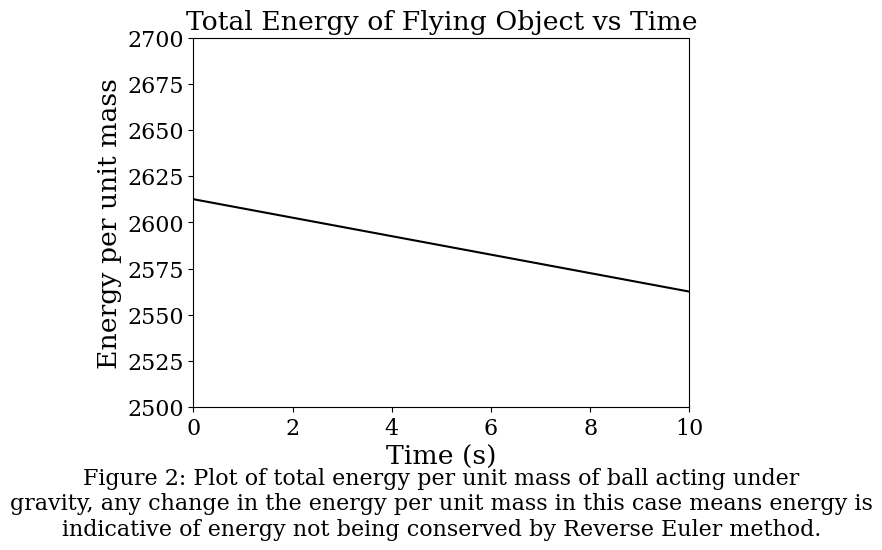

In [155]:
t_0 = 0

potential_energy = np.asarray(euler_v2(250,15,10)[1]) * 10 #KE per unit mass
kinetic_energy = np.asarray(euler_v2(250,15,10)[2])**2 * 0.5 #KE per unit mass
tot_energy = potential_energy + kinetic_energy

plt.plot(euler_v2(250,15,10)[0], potential_energy, color = 'blue',
         label = 'Potential Energy')
plt.plot(euler_v2(250,15,10)[0], kinetic_energy, color = 'red',
         label = 'Kinetic Energy')
plt.plot(euler_v2(250,15,10)[0], tot_energy, color = 'black', linestyle = '--', 
         label = 'Total Energy')
plt.ylabel('Energy per unit mass')
plt.xlabel('Time (s)')
plt.title('Energy of Flying Object vs Time')
plt.text(5, -5000, 'Figure 1: A firgure of the potential energy per unit mass (blue),\n' +
         'kinetic energy per unit mass (red), and total energy\n' +
         'per unit mass (black) of a flying object as a function of time\n' +
         'using Reverse Euler iteration algorithm', horizontalalignment = 'center')
plt.xlim(0,10)
plt.ylim(-2000,5000)
plt.legend()
plt.show()

plt.plot(euler_v2(250,15,10)[0], tot_energy, color = 'black', linestyle = '-')
plt.title('Total Energy of Flying Object vs Time')
plt.ylabel('Energy per unit mass')
plt.xlabel('Time (s)')
plt.xlim(0,10)
plt.ylim(2500,2700)
plt.text(5, 2430.8, 'Figure 2: Plot of total energy per unit mass of ball acting under\n' +
         'gravity, any change in the energy per unit mass in this case means energy is\n' +
         'indicative of energy not being conserved by Reverse Euler method.',
         horizontalalignment = 'center')
plt.show()

### Method 1.9: Averaged Euler's

Still not great, but now instead of overestimating we're underestimating the position on the graph. However, energy IS being conserved. Well, if one is an overestimate and the other is an underestimate for position, maybe averaging them will give us a better answer.

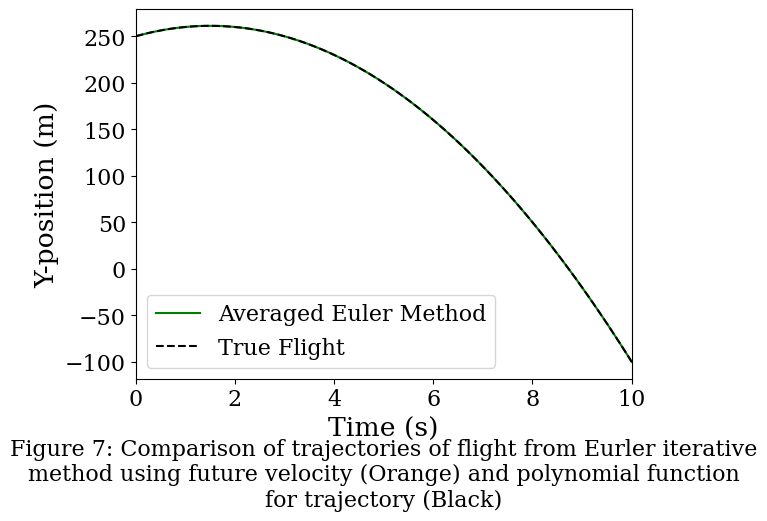

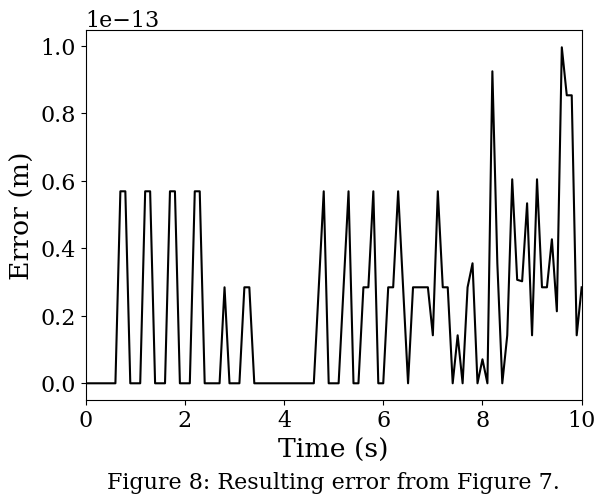

In [162]:
dt = 0.1

t_0 = 0

plt.plot(euler_v2(250,15,10)[0],
         0.5 * np.asarray(euler(250,15,10)[1] + np.asarray(euler_v2(250,15,10)[1])),
         c = 'Green', linestyle = '-',
         label = 'Averaged Euler Method')
plt.plot(flight, traj(250, 15, flight), c = 'black', linestyle = '--', label = 'True Flight')
plt.xlabel('Time (s)')
plt.ylabel('Y-position (m)')
plt.xlim(0,t_f)
plt.text(5,-255,'Figure 7: Comparison of trajectories of flight from Eurler iterative\n' +
        'method using future velocity (Orange) and polynomial function\n' +
         'for trajectory (Black)', horizontalalignment = 'center')
plt.legend()
plt.show()

plt.plot(flight,
         abs((0.5 * np.asarray(euler(250,15,10)[1] + np.asarray(euler_v2(250,15,10)[1]))
              - traj(250, 15, flight))), c = 'black')
plt.xlabel('Time (s)')
plt.ylabel('Error (m)')
plt.xlim(0,t_f)
#plt.ylim(0,5)
plt.text(5, -3.1e-14, 'Figure 8: Resulting error from Figure 7.',
         horizontalalignment = 'center')
plt.show()

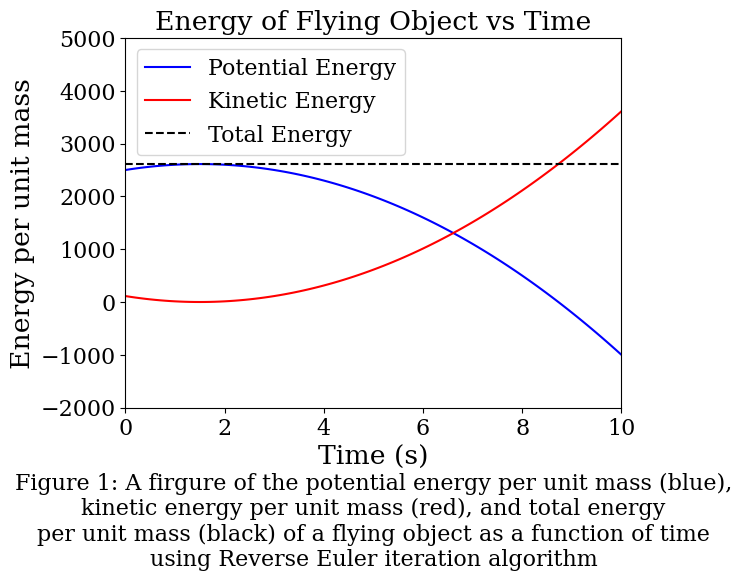

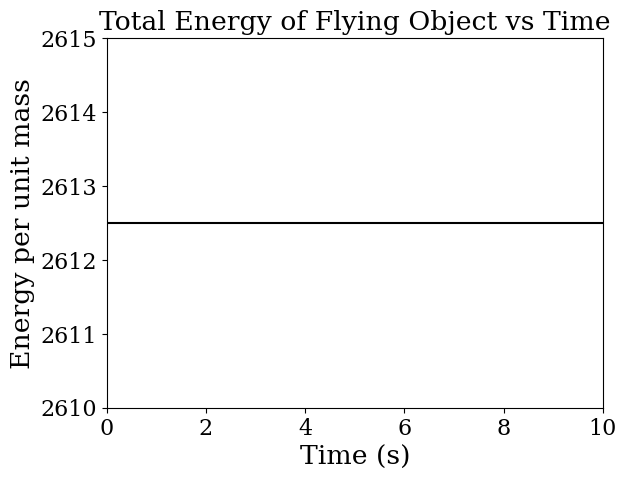

In [170]:
t_0 = 0

euler_avg_pos = 0.5 * np.asarray(euler(250,15,10)[1] + np.asarray(euler_v2(250,15,10)[1]))
euler_avg_vel = 0.5 * np.asarray(euler(250,15,10)[2] + np.asarray(euler_v2(250,15,10)[2]))

potential_energy = euler_avg_pos * 10 #KE per unit mass
kinetic_energy = euler_avg_vel**2 * 0.5 #KE per unit mass
tot_energy = potential_energy + kinetic_energy

plt.plot(euler_v2(250,15,10)[0], potential_energy, color = 'blue',
         label = 'Potential Energy')
plt.plot(euler_v2(250,15,10)[0], kinetic_energy, color = 'red',
         label = 'Kinetic Energy')
plt.plot(euler_v2(250,15,10)[0], tot_energy, color = 'black', linestyle = '--', 
         label = 'Total Energy')
plt.ylabel('Energy per unit mass')
plt.xlabel('Time (s)')
plt.title('Energy of Flying Object vs Time')
plt.text(5, -5000, 'Figure 1: A firgure of the potential energy per unit mass (blue),\n' +
         'kinetic energy per unit mass (red), and total energy\n' +
         'per unit mass (black) of a flying object as a function of time\n' +
         'using Reverse Euler iteration algorithm', horizontalalignment = 'center')
plt.xlim(0,10)
plt.ylim(-2000,5000)
plt.legend()
plt.show()

plt.plot(euler_v2(250,15,10)[0], tot_energy, color = 'black', linestyle = '-')
plt.title('Total Energy of Flying Object vs Time')
plt.ylabel('Energy per unit mass')
plt.xlabel('Time (s)')
plt.xlim(0,10)
plt.ylim(2610,2615)
#plt.text(5, 2611.8, 'Figure 2: Plot of total energy per unit mass of ball acting under\n' +
#         'gravity, any change in the energy per unit mass in this case means energy is\n' +
#         'indicative of energy not being conserved by Reverse Euler method.',
#         horizontalalignment = 'center')
plt.show()

Averaging Forwards and Reverse Euler's actually worked really well for me for both energy conservation and plotting the position of the ball.

## Range-Kutta

Euler's is a good first approximation for the flight of a ball, but it obviously isn't perfect. It's pretty rudimentry and uses little information to make a guess where the ball will be. We can use a more advanced iterative scheme with a more nuanced algorithm to make (hopefully) a better approximation.

The Range-Kutta method seeks a better approximation for $y_{i+1}$ by using more information to make a guess. While Euler's method only considers one velocity (that at $y_i$) to guess the position of $y_{i+1}$ RK uses four: the velocity calculated at $y_i$, an estimated velocity at $y_{i+1}$, and two intermediate estimated velocities at the halfay point between the two points. The velocities are then averaged with a weight placed on the middle two velocities.

$y_{i+1} = y_i + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)\delta t$

where:

$f(t,y) = \frac{dy}{dt}$

$k_1 = f(t,y)$

$k_2 = f(t + \frac{\delta t}{2},y + \frac{k_1}{2}\delta t)$

$k_3 = f(t + \frac{\delta t}{2},y + \frac{k_2}{2}\delta t)$

$k_4 = f(t + \delta t,y + {k_3}\delta t)$

Compare this to our established formula and we'll quickly see the parallels:

$y_{i+1} = y_i + \delta t * v_i$

It's especially simple since we know the time derivative of position (velocity) doesn't depend on position so those k's are quite simple to find:

$k_1 = v_i$

$k_2 = v_i - \frac{\delta t}{2} * g$

$k_3 = k_2 = v_i - \frac{\delta t}{2} * g$

$k_4 = v_i - \delta t * g$

We're essentially replacing $v_i$ with $\frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$ as the estimate of velocity, dividing by six since there are 6 k terms (Counting the 2 $k_2$ & 2 $k_3$ terms) so we just get one, averaged, velocity.

As pointed out above, $k_2$ and $k_3$ are the same so I'll just combing them into one $k_{23}$ term weighed with a coefficient of 4

Also since the time derivative of the velocity is always the constant g we don't need to worry about the velocity, we can keep the same method.

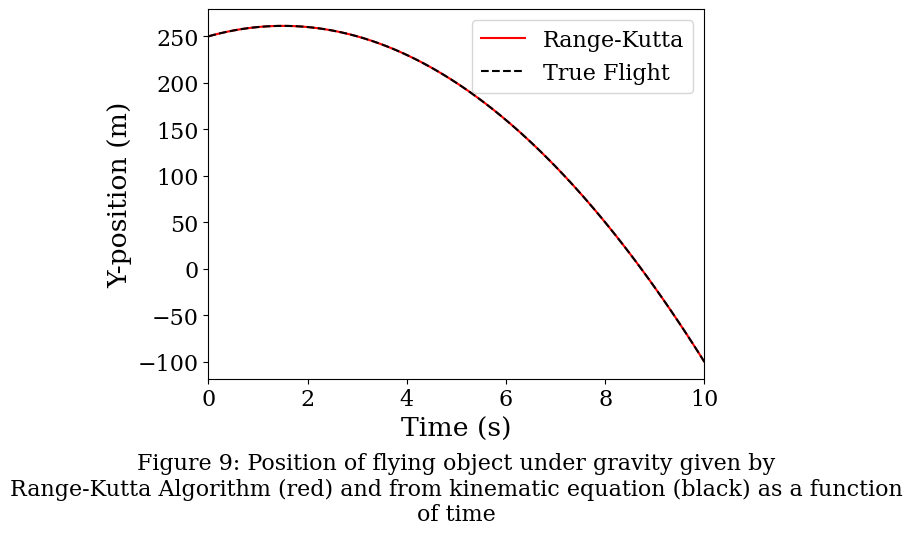

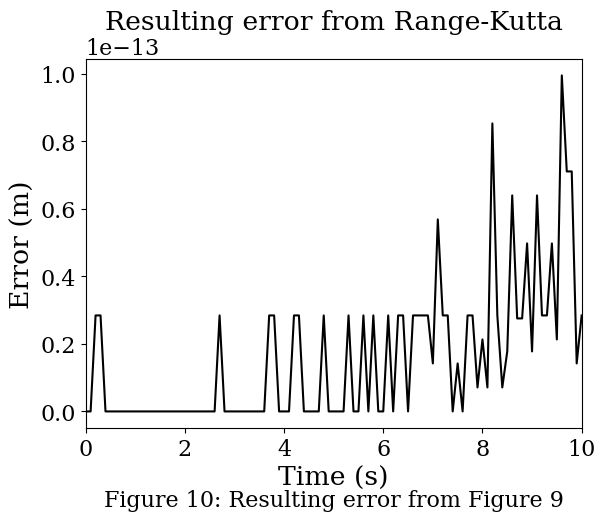

In [176]:
t_0 = 0 

def RK_flight(y0,v0,tf):
    time = [t_0]
    pos = [y0]
    vel = [v0]
    i = 0
    while time[i] < t_f:
        #update time
        time.append(t_0 + (i + 1) * dt)
        #update position
        k_1 = vel[i]
        k_23 = vel[i] - 0.5 * dt * g
        k_4 = vel[i] - dt * g
        pos.append(pos[i] + (1/6) * dt * (k_1 + 4*k_23 + k_4))
        #update velocity
        vel.append(vel[i] - dt * g)
        i = i + 1
    return time, pos, vel

dt = 0.1

t_f = 10

nstep = int(t_f / dt + 1)

flight = np.linspace(0, t_f, nstep)

plt.plot(RK_flight(250, 15, 10)[0], RK_flight(250, 15, 10)[1], c = 'red', linestyle = '-',
         label = 'Range-Kutta')
plt.plot(flight, traj(250, 15, flight), c = 'black', linestyle = '--', 
         label = 'True Flight')
plt.xlim(0,t_f)
plt.xlabel('Time (s)')
plt.ylabel('Y-position (m)')
plt.text(5,-270, 'Figure 9: Position of flying object under gravity given by\n' +
         'Range-Kutta Algorithm (red) and from kinematic equation (black) as a function\n' +
        'of time', horizontalalignment = 'center')
plt.legend()
plt.show()

plt.plot(flight, abs((RK_flight(250,15,1e6)[1] - traj(250, 15, flight))), c = 'black')
plt.xlabel('Time (s)')
plt.ylabel('Error (m)')
plt.xlim(0,t_f)
#plt.ylim(-1e-30,1e-30)
plt.title('Resulting error from Range-Kutta')
plt.text(5, -2.8e-14, 'Figure 10: Resulting error from Figure 9',
        horizontalalignment = 'center')
#plt.xscale('log')
#plt.yscale('log')
plt.show()

What a massive improvement! From error on the order of a meter to an error on the order of a hundred millionth of a width of a hair. I'd say this is a completely adequate model of a falling object ignoring nonconstant acceleration or air resistance!

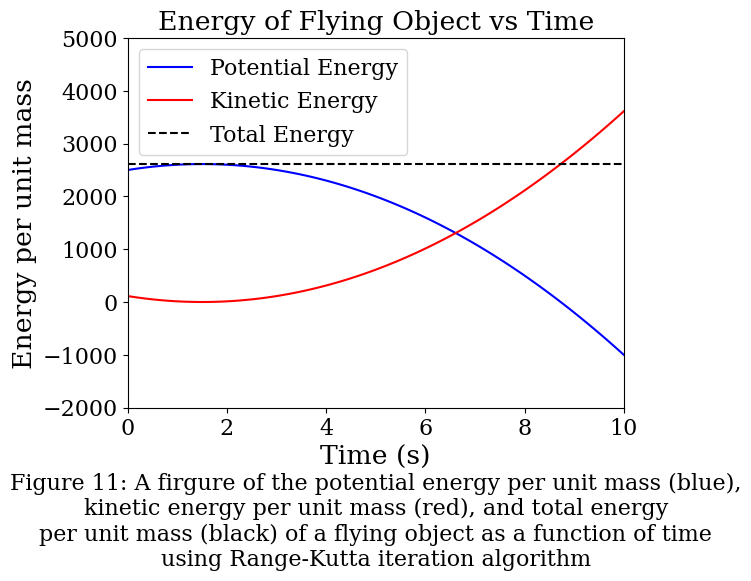

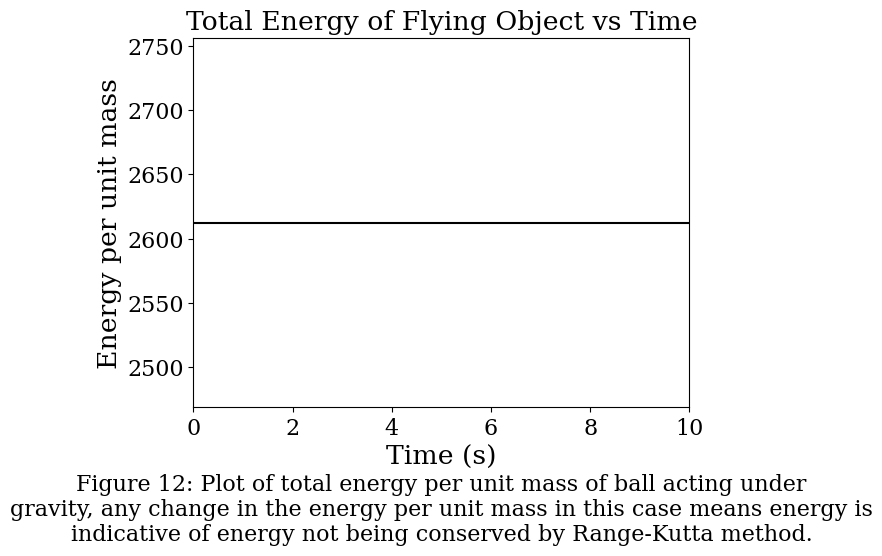

In [189]:
potential_energy_v2 = np.asarray(RK_flight(250,15,10)[1]) * 10 #KE per unit mass
kinetic_energy_v2 = np.asarray(RK_flight(250,15,10)[2])**2 * 0.5 #KE per unit mass
tot_energy_v2 = potential_energy_v2 + kinetic_energy_v2

plt.plot(RK_flight(250,15,10)[0], potential_energy_v2, color = 'blue',
         label = 'Potential Energy')
plt.plot(RK_flight(250,15,10)[0], kinetic_energy_v2, color = 'red',
         label = 'Kinetic Energy')
plt.plot(RK_flight(250,15,10)[0], tot_energy_v2, color = 'black', linestyle = '--', 
         label = 'Total Energy')
plt.ylabel('Energy per unit mass')
plt.xlabel('Time (s)')
plt.title('Energy of Flying Object vs Time')
plt.text(5, -5000, 'Figure 11: A firgure of the potential energy per unit mass (blue),\n' +
         'kinetic energy per unit mass (red), and total energy\n' +
         'per unit mass (black) of a flying object as a function of time\n' +
         'using Range-Kutta iteration algorithm', horizontalalignment = 'center')
plt.xlim(0,10)
plt.ylim(-2000,5000)

plt.legend()
plt.show()

plt.plot(RK_flight(250,15,10)[0], tot_energy_v2, color = 'black', linestyle = '-')
plt.title('Total Energy of Flying Object vs Time')
plt.ylabel('Energy per unit mass')
plt.xlabel('Time (s)')
plt.text(5, 2365, 'Figure 12: Plot of total energy per unit mass of ball acting under\n' +
         'gravity, any change in the energy per unit mass in this case means energy is\n' +
         'indicative of energy not being conserved by Range-Kutta method.',
         horizontalalignment = 'center')
plt.xlim(0,10)
plt.show()

As you can see, the total energy of this one is much more constant. We can compare the max and min values to see how much the energy per unit mass has changed to see, quantifiably, how improved this method is!

In [192]:
print('The largest change in energy from RK is ' +
      str(max(tot_energy_v2) - min(tot_energy_v2)) + ' Joules')

The largest change in energy from RK is 4.547473508864641e-13 Joules


We see the largest change in energy calculated from the RK method was $4.55 * 10^{-13}$ Joules, which is a number so small I'm not even going to bother writing it out. How amazing such a small change can create such a profound effct on the accuracy and practicality of the algorithm!

### Comparison to real world data

Now let's compare it with real world data taken via Tracker analysis of falling ball to see if there's any error.

h = 41 in = 1.04 meters

The ball has a radius of 3.7 cm and a sphere shape.

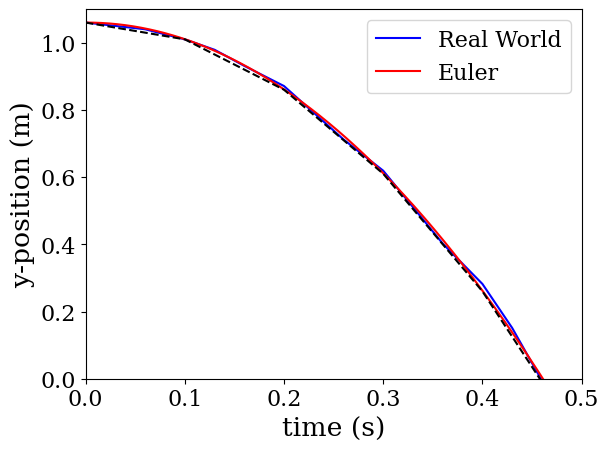

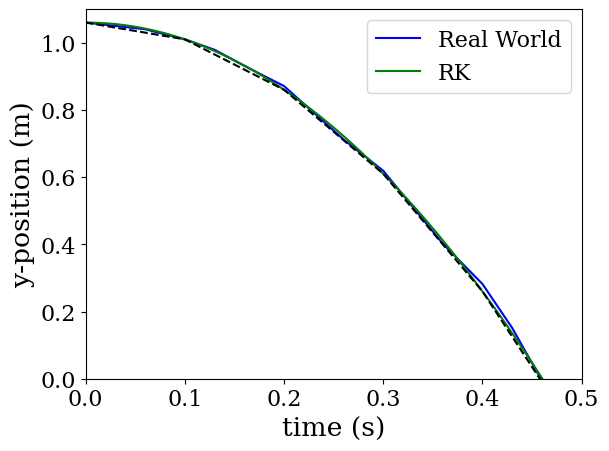

In [196]:
data = pd.read_csv('Ball_Descent.csv')

t_0 = 1.27

dt = 1e-3

plt.plot((data['Time'] - t_0), data['yNew'], label = 'Real World', color = 'blue')
plt.plot((np.asarray(euler(1.04,0,2.5)[0]) - t_0),
         euler(1.06,0,2.5)[1], label = 'Euler', color = 'red')
plt.plot(flight, traj(1.06, 0, flight), color = 'black', linestyle = '--')
plt.xlim(0, 0.5)
plt.ylim(0,1.1)
plt.xlabel('time (s)')
plt.ylabel('y-position (m)')
plt.legend()
plt.show()

plt.plot((data['Time'] - t_0), data['yNew'], label = 'Real World', color = 'blue')
plt.plot((np.asarray(euler(1.04,0,2.5)[0]) - t_0),
         RK_flight(1.06,0,2.5)[1], label = 'RK', color = 'green')
plt.plot(flight, traj(1.06, 0, flight), color = 'black', linestyle = '--')
plt.xlim(0, 0.5)
plt.ylim(0,1.1)
plt.xlabel('time (s)')
plt.ylabel('y-position (m)')
plt.legend()
plt.show()

Since the time of flight is so low I had to reduce the time step of the function meaning the accuracy of Range-Kutta and Euler seem to track very well with the real world data and the analytical function. If anthing this shows the inaccuracy of the tracker measurements. The main issue I believe are the frame rate of the camera limiting the number of data points of the trajectory of the ball. The blue line representing the data seems a lot less smooth than the either the dashed line or the algorithm's line.

Add Tracker Screenshots

## Air Resistance

For an added layer of complexity let's add air resistance to the code. This is honestly only a small alteration since air resistance in terms of our code is onlt altering the acceleration of the object as it descends.

$F_D = \frac{1}{2}C_dAv^2\rho$

$F_{net} = F_g - F_D = mg - m\frac{1}{2}C_dAv^2\rho$

$a = g - \frac{1}{2}C_dAv^2\rho$

This is actually quite neat because, as mentioned, this will only slightly alter the RK code while granting us much more complexity and real world applicability. Compare this to having to make an analytical function including drag. One would have to do some tricky differential equations and integration, things that a computer has a bit of difficulty doing. Integrating air resistance into our iterative scheme, however, is painless, straightforward, and generalized.

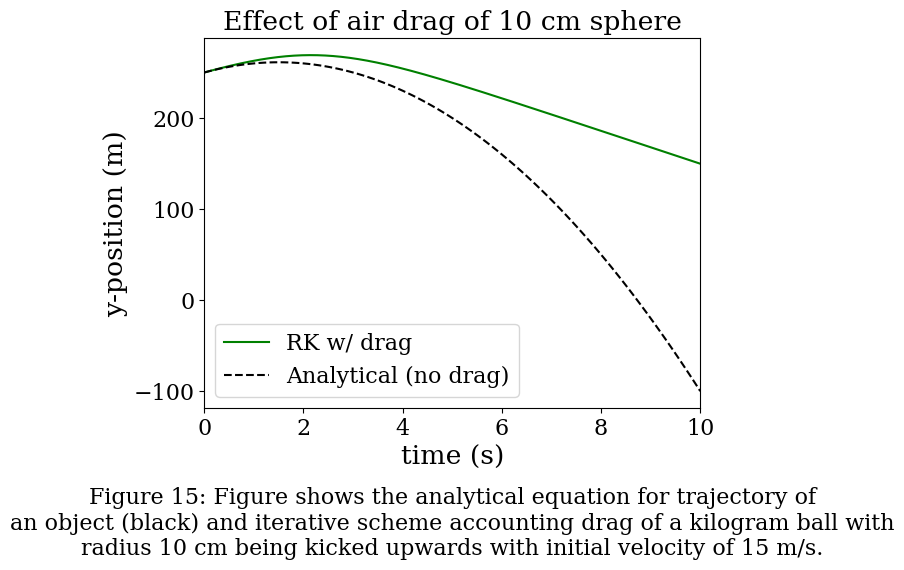

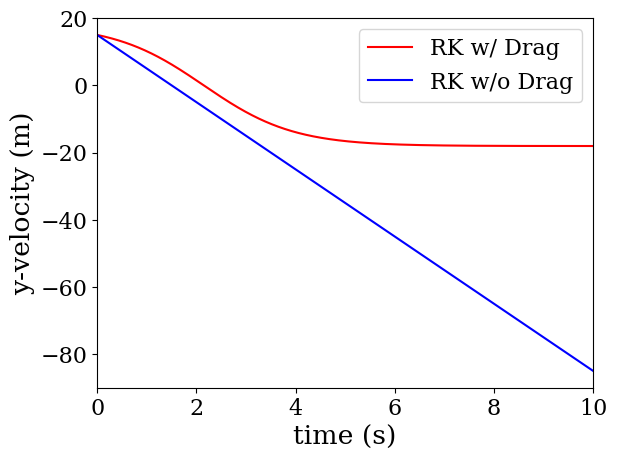

In [203]:
t_0 = 0

rho = 1.225 #kg/m^3


def air_drag(C_d, Area):
    return 0.5*rho*C_d*Area
    

def RK_flight_v2(y0,v0,tf,shape,radius):
    time = [t_0]
    pos = [y0]
    vel = [v0]
    i = 0
    while time[i] < t_f:
        #update time
        time.append(t_0 + (i + 1) * dt)
        #update position
        k_1 = vel[i]
        k_23 = vel[i] - 0.5 * dt * (g - vel[i]**2 * air_drag(shape, radius))
        k_4 = vel[i] - dt * (g - vel[i]**2 * air_drag(shape, radius))
        pos.append(pos[i] + (1/6) * dt * (k_1 + 4*k_23 + k_4))
        #update velocity
        vel.append(vel[i] - dt * (g - vel[i]**2 * air_drag(shape, radius)))
        i = i + 1
    return time, pos, vel

## For our case we're working with a very smooth pingpong ball with drag coefficient C_d = 0.5

plt.plot((np.asarray(euler(1.04,0,2.5)[0]) - t_0),
         RK_flight_v2(250,15,10,0.5, 0.1)[1], label = 'RK w/ drag', color = 'green')
plt.plot(flight, traj(250, 15, flight), color = 'black', linestyle = '--',
         label = 'Analytical (no drag)')
plt.title('Effect of air drag of 10 cm sphere')
plt.xlim(0, 10)
plt.xlabel('time (s)')
plt.ylabel('y-position (m)')
plt.text(5, -280, 'Figure 15: Figure shows the analytical equation for trajectory of\n' +
         'an object (black) and iterative scheme accounting drag of a kilogram ball with\n' +
         'radius 10 cm being kicked upwards with initial velocity of 15 m/s.',
         horizontalalignment = 'center')
plt.legend()
plt.show()

plt.plot((np.asarray(euler(1.04,0,2.5)[0]) - t_0),
         RK_flight_v2(250,15,10,0.5, 0.1)[2], label = 'RK w/ Drag', color = 'Red')
plt.plot((np.asarray(euler(1.04,0,2.5)[0]) - t_0),
         RK_flight(250,15,10)[2], label = 'RK w/o Drag', color = 'Blue')
plt.xlim(0, 10)
plt.xlabel('time (s)')
plt.ylabel('y-velocity (m)')
plt.legend()
plt.show()

What's fascinating is that these iterative schemes make it easier to add complexity as adding the drag just required a basic function to find the drag coefficient and a small alteration to the code of the RK function. But since the drag so heavily relies on the instantaneous velocity of the object it makes making a analytical function accounting for air resistance really difficult. Doing it in step in accordance to an iterative scheme was actually easier and simpler than seeking a function that works for any moment of time.